# Neural Networks(NN) Implementation

Environment:
- python==3.11.11
- tensorflow==2.17.1
- keras==3.5.0


## Data Preprocessing

### Step 1: Use tensorflow to build keras

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


### Step 2: Import NumPy and Matplotlib
**NumPy** allows us to perform matrix operations and other mathematical computations.

**Matplotlib** helps us visualize data by creating plots and graphs.

In [2]:
%matplotlib inline

import numpy
import matplotlib.pyplot

### Step 3: Download MNIST

In [3]:
from keras.datasets import mnist
(train_data, train_ans), (test_data, test_ans) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# test
test_data[7122]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167,
        253,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 235,
        254, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 254,
        254, 187,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 224, 254,
        253,  67,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 252, 254,
        196,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 231, 255, 254,
        116,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 255, 254, 225,
         22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 254, 254, 124,
          0,   0,   0,   0,   0,  34,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  36, 243, 255, 248,  51,
          0,   0,   0,   1, 163, 235, 225, 196,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  84, 254, 254, 175,   0,
          0,   0,   0, 170, 254, 254, 254, 246,  73,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 167, 254, 254,  52,   0,
          0,   0, 121, 254, 254, 254, 254, 254, 104,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 188, 254, 243,  26,   0,
          0,  52, 254, 254, 254, 177, 254, 254, 126,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  28, 238, 254, 181,   0,   0,
          0,  53, 254, 254, 187,  41, 254, 247,  54,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 254, 181,   0,   0,
         16, 203, 254, 254,  62, 185, 254, 221,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 188, 254, 139,   0,   0,
        110, 254, 254, 254, 157, 250, 254,  98,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 136, 254, 187,   3,   0,
        110, 254, 254, 254, 254, 254, 184,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  84, 254, 254,  31,   0,
        110, 254, 254, 254, 254, 218,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 186, 254, 174, 115,
        175, 254, 254, 253, 165,  23,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 237, 254, 254,
        254, 254, 232, 123,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 242, 254,
        254, 169,  29,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

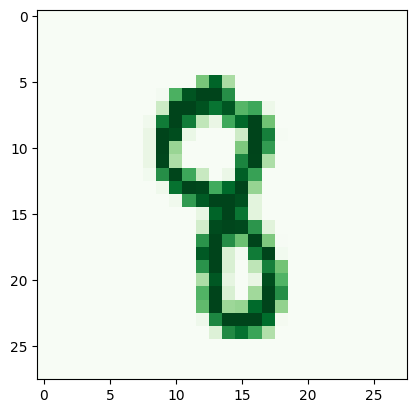

In [5]:
# test
matplotlib.pyplot.imshow(train_data[7122], cmap = 'Greens')

### Step 4: Adjust the shape of the input images

In [6]:
train_data = train_data.reshape(60000, 784) # 28 * 28 = 784
test_data = test_data.reshape(10000, 784)

### Step 5: Set output data format
Convert the answer to One-Hot Encoding format.

In [7]:
from keras import utils
train_ans = utils.to_categorical(train_ans, 10)
test_ans = utils.to_categorical(test_ans, 10)

In [8]:
#test
train_ans[7122]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

## Build Model

### Step 6: Import libraries

In [9]:
from keras.models import Sequential # model object
from keras.layers import Dense, Activation, Dropout #Dense: 設定layer的neuron數, Acitvation:激勵函數
from tensorflow.keras.optimizers import SGD # 載入stochastic gradient decent的optimzer

### Step 7: Create NN object

In [10]:
model = Sequential() # 建立神經網路物件

### Step 8: Add first Hidden Layer


In [11]:
layer1_size = 800
model.add(Dense(layer1_size, input_dim = 784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 9: Add second Hidden Layer

In [12]:
layer2_size = 800
model.add(Dense(layer2_size, input_dim = layer1_size)) # 新增一個hidden layer(含800個神經元, 輸入維度800)
model.add(Activation('sigmoid')) # 新增layer2的activation: sigmoid
model.add(Dropout(0.4))

### Step 10: Add an output layer

In [13]:
output_size = 10
model.add(Dense(output_size, input_dim = layer2_size))
model.add(Activation('softmax')) # 新增output layer的activation: sigmoid

### Step 11: Build the neural network

In [14]:
# 設定loss function: mse(平方平均), optimzer: SGD, learing_rate = 0.1, 評比標準: accuracy
model.compile(loss = 'mse', optimizer = SGD(learning_rate = 0.1), metrics = ['accuracy'])

### Step 12: View network structure

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 800)                 │         640,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           8,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,276,810 (4.87 MB)

 Trainable params: 1,276,810 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

### Step 13: Train NN

In [16]:
model.fit(train_data, train_ans, batch_size = 50, epochs = 40)

Epoch 1/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2433 - loss: 0.0853
Epoch 2/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6701 - loss: 0.0490
Epoch 3/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8044 - loss: 0.0310
Epoch 4/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8505 - loss: 0.0237
Epoch 5/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8667 - loss: 0.0205
Epoch 6/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8809 - loss: 0.0183
Epoch 7/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8908 - loss: 0.0167
Epoch 8/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8975 - loss: 0.0158
Epoch 9/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9030 - loss: 0.0148
Epoch 10/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.0144
Epoch 11/40
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9117 - loss: 0.0136
Epoch 12/40
1200/1200 ━━━━━━━━

### Step 14: Evaluate model performance

In [17]:
score = model.evaluate(test_data, test_ans)
print("loss : ", score[0])
print("acc : ", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9504 - loss: 0.0073
loss :  0.006386116147041321
acc :  0.9563999772071838


### Step 15: Import helpful tool for showing learning results

In [18]:
#show results
from ipywidgets import interact_manual

### Step 16: Define `test()` function

`Test()` function is used to display the model's predictions.



In [19]:
def test(index) :
  matplotlib.pyplot.imshow(test_data[index].reshape(28,28), cmap = "Greys")
  print("神經網路判斷為：", predict[index])

### Step 17: Predict unknown image with model

In [20]:
predict = model.predict(test_data)
print(predict[7122])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.0190886e-04 2.1608896e-05 6.4944598e-04 2.1001010e-06 4.3238182e-02
 1.1174752e-04 9.5532787e-01 1.0889863e-04 1.0771998e-04 3.3050211e-04]


### Step 18: Transform one-hot encoded values into integers

In [21]:
predict = numpy.argmax(predict, axis = -1)
print(predict[7122])

6


### Step 19: Interactive display of prediction results

interactive(children=(IntSlider(value=4999, description='index', max=9999), Button(description='Run Interact',…

<function __main__.test(index)>

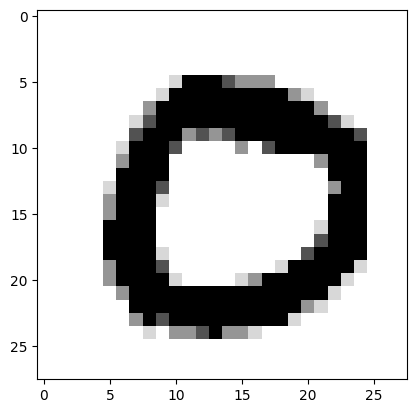

In [22]:
interact_manual(test, index = (0,9999))

### Step 20: Save the trained model and parameters

In [23]:
model.save("handwriting_model.keras")

### Step 21: Open the trained model and parameters

In [24]:
from keras.models import load_model
model2 = load_model("handwriting_model.keras")

In [25]:
# test
predict = model2.predict(test_data)
print(predict[7122])
predict = numpy.argmax(predict, axis=-1)
print(predict[7122])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.0190886e-04 2.1608896e-05 6.4944598e-04 2.1001010e-06 4.3238182e-02
 1.1174752e-04 9.5532787e-01 1.0889863e-04 1.0771998e-04 3.3050211e-04]
6
